In [1]:
# TODO: загнать в коллаб

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# предварительное исследование
from PIL import Image
import os
import numpy as np

path = "train_butterflies"
classes = sorted([d for d in os.listdir(path)])

total = 0
balance_ = dict()
resolutions = set()

for class_ in classes:
    class_path = os.path.join(path, class_)
    balance_[class_] = 0
    class_images = [_ for _ in os.listdir(class_path)]

    for image in class_images:
        img_path = os.path.join(class_path, image)
        total += 1
        balance_[class_] += 1
        with Image.open(img_path) as img:
            width, height = img.size
            resolutions.add((width, height))

balance = sorted(balance_.items(), key=lambda item: item[1])
print("Всего изображений", total) # 4955

Всего изображений 6950


In [2]:
print("Разрешение:", resolutions)

Разрешение: {(224, 224)}


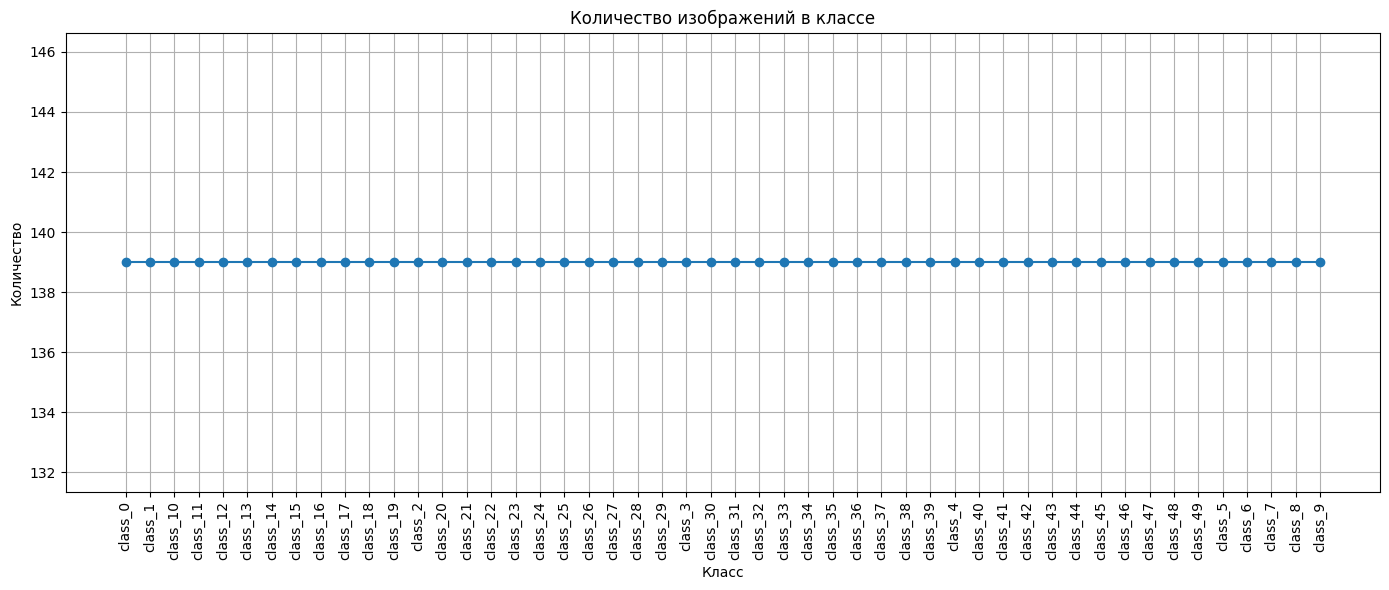

In [3]:
classes = [item[0] for item in balance]
values = [item[1] for item in balance]

plt.figure(figsize=(14, 6))
plt.plot(classes, values, marker='o')
plt.xticks(rotation=90)
plt.title('Количество изображений в классе')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# # сделаем аугментацию
# import random
# from torchvision import transforms

# max_balance = max([item[1] for item in balance])

# augment = transforms.Compose([
#     transforms.RandomResizedCrop(size=224, scale=(0.75, 1.0)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),

#     transforms.ColorJitter(
#         brightness=0.3,
#         contrast=0.3,
#         saturation=0.3,
#         hue=0.1
#     ),

#     transforms.RandomAutocontrast(p=0.5),
#     transforms.RandomAdjustSharpness(sharpness_factor=2.0, p=0.3),
# ])

# for class_ in classes:
#     class_path = os.path.join(path, class_)
#     class_images = [_ for _ in os.listdir(class_path)]

#     to_add = max_balance - balance_[class_]
#     if to_add <= 0:
#         continue

#     # print(f"Класс {class_}: есть {balance_[class_]}, нужно добавить {to_add}")

#     for i in range(to_add):
#         prey = random.choice(class_images)
#         img_path = os.path.join(class_path, prey)
#         img = Image.open(img_path).convert("RGB")

#         aug_img = augment(img)

#         name, ext = os.path.splitext(prey)
#         new_fname = f"{name}_aug_{i}{ext}"
#         aug_img.save(os.path.join(class_path, new_fname))

In [5]:
# подготовка данных для обучения
# Создать тренировочную и тестовую подвыборки для обучения и тестирования работы моделей
# Создать класс на фреймворке PyTorch для создания датасета done
# Создать loader для передачи данных в модель нейронной сети

from torch.utils.data import Dataset
import torchvision.transforms.v2 as tfs
import torch.utils.data as data

class ButterflyDataset(Dataset):
    def __init__(self, transform=None):

        self.root_dir = os.path.join("train_butterflies")
        self.transform = transform

        self.samples = []  # (path, class_idx)
        self.class_to_idx = {f'class_{i}': i for i in range(50)}

        class_names = self.class_to_idx.keys()

        for idx, class_name in enumerate(class_names):
            class_path = os.path.join(self.root_dir, class_name)
            if not os.path.isdir(class_path):
                continue
            self.class_to_idx[class_name] = idx

            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                if os.path.isfile(fpath) and fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.samples.append((fpath, idx))

        self.len = len(self.samples)

    def __getitem__(self, index):
        img_path, label = self.samples[index]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return self.len

d_train = ButterflyDataset(transform=tfs.ToImage())


In [6]:
d_train, d_val = data.random_split(d_train, [0.7, 0.3])
train_data = data.DataLoader(d_train, batch_size=32, shuffle=True)
train_data_val = data.DataLoader(d_val, batch_size=32, shuffle=False)

In [ ]:
# реализация модели
model = nn.Linear(
    
)